In [1]:
import dill
import math
import numpy as np
from pprint import pprint
from bayes_opt import BayesianOptimization

CURRENT_YEAR = 2023
MAX_YEAR = 2123
years = list(range(CURRENT_YEAR, MAX_YEAR))
delays = {}

exec(open('utils.py').read())
print('Loaded')

Loaded


## Algorithms/insights delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 7         | -0.2045   | 4.319     | 5.997     | 0.167     |
| 16        | -0.1982   | 1.063     | 5.583     | 0.8192    |
| 55        | -0.1425   | 0.03163   | 9.435     | 0.5642    |
| 56        | -0.1103   | 0.2131    | 8.025     | 0.4058    |
| 64        | -0.07798  | 0.09013   | 9.61      | 0.6629    |
| 66        | -0.06775  | 0.02644   | 9.579     | 1.002     |
| 72        | -0.04457  | 0.1998    | 9.682     | 0.6224    |
| 101       | -0.02713  | 0.6347    | 9.645     | 0.4756    |
Curve params found
{'push': 0.6347083540379642,
 'shift': 9.644733614992607,
 'slope': 0.4755708781024496}
-
## Chance of nonscaling delay ##


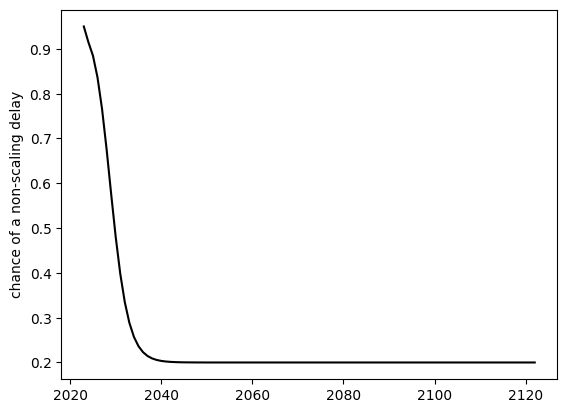

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 91%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 89%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 84%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 77%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 68%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 58%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 48%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 33%
Year: 2033

In [10]:
nonscaling_points = [(2023, 0.95),
                     (2027, 0.8),
                     (2030, 0.5),
                     (2035, 0.3),
                     (2050, 0.2)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['algorithms'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(3, 10)], [0.1, sq.lognorm(3, 30)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['algorithms']['length'] @ 1000, digits=0))

## Data delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 16        | -0.25     | 0.2117    | 9.165     | 7.528     |
| 41        | -0.25     | 0.01      | 4.61      | 10.0      |
| 44        | -0.25     | 0.01      | 6.732     | 7.416     |
| 46        | -0.25     | 0.01192   | 9.133     | 5.766     |
| 48        | -0.25     | 0.01      | 5.228     | 5.447     |
| 52        | -0.2498   | 0.01      | 4.724     | 3.307     |
| 77        | -0.2495   | 0.01      | 5.688     | 3.127     |
Curve params found
{'push': 0.01, 'shift': 5.68824104907205, 'slope': 3.126692116506052}
-
## Chance of nonscaling delay ##


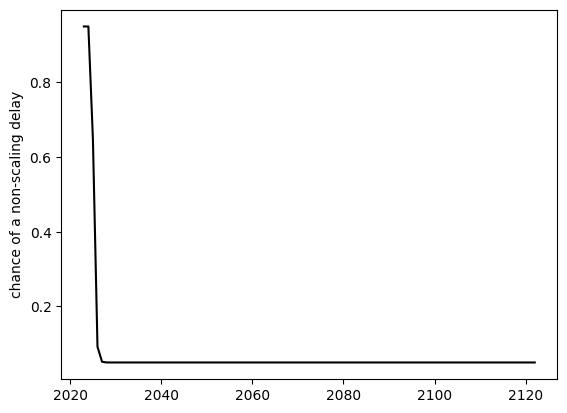

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 65%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 9%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2033 - chan

In [12]:
nonscaling_points = [(2023, 0.95),
                     (2027, 0.9),
                     (2030, 0.2),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['data'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(1, 10)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['data']['length'] @ 1000, digits=0))

## Robotics need delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.06195  | 2.974     | 5.136     | 4.612     |
| 5         | -0.05412  | 2.652     | 7.342     | 9.727     |
| 15        | -0.01707  | 0.1386    | 1.092     | 6.255     |
| 27        | -0.01667  | 0.09799   | 5.129     | 6.883     |
| 34        | -0.01667  | 0.1323    | 9.889     | 3.289     |
| 41        | -0.01667  | 0.01      | 7.907     | 5.241     |
| 52        | -0.01667  | 0.01      | 6.67      | 3.18      |
| 64        | -0.01616  | 0.01      | 4.786     | 1.611     |
Curve params found
{'push': 0.01, 'shift': 4.7857785549651535, 'slope': 1.611294035373178}
-
## Chance of nonscaling delay ##


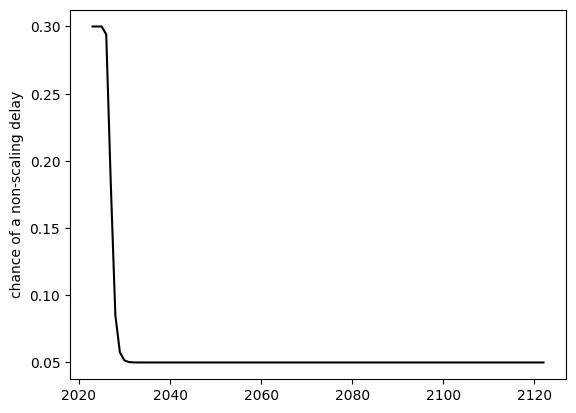

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 29%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 9%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2033 - ch

In [13]:
nonscaling_points = [(2023, 0.3),
                     (2030, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['robotics'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 5)],
                                                                        [0.1, sq.lognorm(5, 10)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['robotics']['length'] @ 1000, digits=0))

##  Real world feedback delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.0336   | 4.598     | 5.075     | 6.3       |
| 5         | -0.03016  | 3.633     | 7.173     | 1.687     |
| 10        | -0.01901  | 1.395     | 9.162     | 1.396     |
| 22        | -0.01578  | 0.9537    | 6.322     | 0.7158    |
| 33        | -0.01355  | 0.4748    | 9.307     | 7.638     |
| 41        | -0.01333  | 0.01      | 5.77      | 6.965     |
| 42        | -0.01333  | 0.01      | 5.749     | 2.72      |
| 83        | -0.01333  | 0.01      | 2.193     | 2.553     |
| 99        | -0.01325  | 0.01      | 6.145     | 1.755     |
Curve params found
{'push': 0.01, 'shift': 6.144630586657961, 'slope': 1.7552076314124254}
-
## Chance of nonscaling delay ##


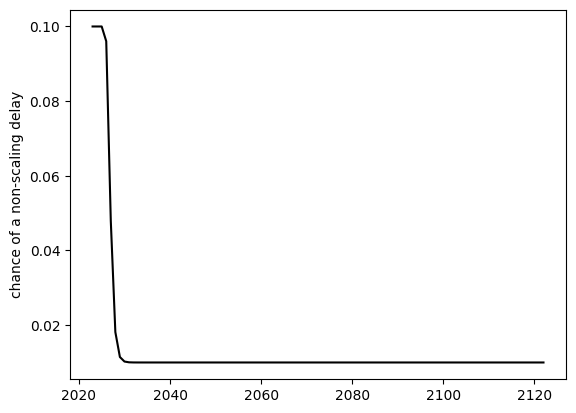

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 1%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 1%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 1%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 1%
Year: 2033 - cha

In [17]:
nonscaling_points = [(2023, 0.1),
                     (2030, 0.05),
                     (2050, 0.01)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['real_world_feedback'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(3, 10)],
                                                                                   [0.1, sq.lognorm(10, 30)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['real_world_feedback']['length'] @ 1000, digits=0))

## Policy delay (e.g., pause)

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.07988  | 5.586     | 6.442     | 7.033     |
| 3         | -0.07657  | 5.536     | 9.992     | 1.522     |
| 4         | -0.06849  | 2.862     | 5.242     | 6.0       |
| 6         | -0.03363  | 0.05179   | 4.986     | 0.3595    |
| 11        | -0.03333  | 0.04727   | 4.503     | 2.875     |
| 22        | -0.02843  | 0.3535    | 9.094     | 0.8265    |
| 45        | -0.02759  | 1.166     | 7.808     | 0.4321    |
| 61        | -0.001614 | 0.3684    | 3.491     | 0.3519    |
Curve params found
{'push': 0.3684327216398942,
 'shift': 3.4911151271158527,
 'slope': 0.3519222272058828}
-
## Chance of nonscaling delay ##


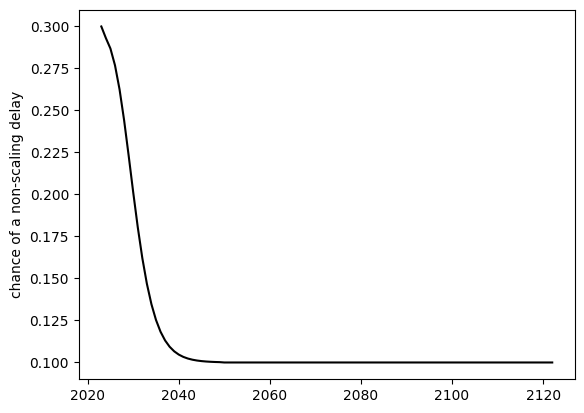

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 29%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 29%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 28%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 26%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 24%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 22%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 16%
Year: 2033

In [15]:
nonscaling_points = [(2023, 0.3),
                     (2030, 0.2),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['policy_pause'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(1, 5)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['policy_pause']['length'] @ 1000, digits=0))

## Save

In [16]:
with open('caches/nonscaling_delays.dill', 'wb') as f:
    dill.dump(delays, f)
    
print('cached!')

cached!
